# Python Machine Learning Demo - Part l

## Overview of the Predictive Modeling Case
A financial services company offers a home equity line of credit to its clients. The
company has extended several thousand lines of credit in the past, and many of these
accepted applicants (approximately 20%) have defaulted on their loans. By using
geographic, demographic, and financial variables, the company wants to build a model
to predict whether an applicant will default.

## Data
After analyzing the data, the company selected a subset of 12 predictor (or input)
variables to model whether each applicant defaulted. The response (or target) variable
(BAD) indicates whether an applicant defaulted on the home equity line of credit.
These variables, along with their model role, measurement level, and description, are
shown in the following table from the **HMEQ** data set.

| Name      | Model Role | Measurement Level | Description                                                            |
|:----------|:-----------|:------------------|:-----------------------------------------------------------------------|
| BAD       | Target     | Binary            | 1 = applicant defaulted on loan or delinquent, 0 = applicant paid loan |
| CLAGE     | Input      | Interval          | Age of oldest credit line in months                                    |
| CLNO      | Input      | Interval          | Number of credit lines                                                 |
| DEBTINC   | Input      | Interval          | Debt-to-income ratio                                                   |
| DELINQ    | Input      | Interval          | Number of delinquent credit lines                                      |
| DEROG     | Input      | Interval          | Number of derogatory reports                                           |
| JOB       | Input      | Nominal           | Occupational categories                                                |
| LOAN      | Input      | Interval          | Amount of loan request                                                 |
| MORTDUE   | Input      | Interval          | Amount due on existing mortgage                                        |
| NINQ      | Input      | Interval          | Number of recent credit inquiries                                      |
| REASON    | Input      | Binary            | DebtCon = debt consolidation, HomeImp = home improvement               |
| VALUE     | Input      | Interval          | Value of current property                                              |
| YOJ       | Input      | Interval          | Years at present job                                                   |

# Load Packages

In [1]:
import swat
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
swat.options.cas.print_messages = True

# Connect to CAS

In [2]:
conn = swat.CAS("server.demo.sas.com", 30570, "christine", "Student1")

# CAS Session

In [3]:
conn.session.listSessions()

,SessionName,UUID,State,Authentication,Userid
0,py-session-1:Thu Mar 20 15:57:27 2025,07d1cbd7-0e57-ed4c-9faa-04c9d5af77c8,Connected,OAuth,christine


In [4]:
# Change timeout
mytime = 60*60*12
conn.session.timeout(time=mytime)
conn.session.sessionStatus()

[state]

 'Connected'

[number of Connections]

 1

[Timeout]

 43200

[ActionStatus]

 'Action is active'

[Authenticated]

 'Yes'

[locale]

 'en_US'

+ Elapsed: 0.000423s, sys: 0.0004s, mem: 0.207mb

# Load Data onto the Server

In [5]:
# Read in the hmeq CSV to an in-memory data table and create a CAS table object reference
castbl = conn.read_csv("data/hmeq.csv", casout = dict(name="hmeq", replace=True))

# Create variable for the in-memory data set name
indata = 'hmeq'

NOTE: Cloud Analytic Services made the uploaded file available as table HMEQ in caslib CASUSER(christine).
NOTE: The table HMEQ has been created in caslib CASUSER(christine) from binary data uploaded to Cloud Analytic Services.


# Distributed Data

In [6]:
conn.table.tableDetails(
    level="node",
    caslib="casuser",
    name=indata
)

,Node,Blocks,Active,Rows,IndexSize,DataSize,VardataSize,CompressedSize,CompressionRatio,Mapped,MappedMemory,Unmapped,UnmappedMemory,Allocated,AllocatedMemory,DeletedRows,TableLocation
0,controller.sas-cas-server-default.edu.svc.clus...,8,8,5960,0,785334,70134,0,0,0,0,0,0,8,785360,0,CAS


In [7]:
conn.table.tableDetails(
    level="block",
    caslib="casuser",
    name=indata
)

,Node,Blocks,Active,Rows,IndexSize,DataSize,VardataSize,CompressedSize,CompressionRatio,Mapped,MappedMemory,Unmapped,UnmappedMemory,Allocated,AllocatedMemory,DeletedRows,TableLocation
0,controller.sas-cas-server-default.edu.svc.clus...,1,1,812,0,106749,9309,0,0,0,0,0,0,1,106752,0,
1,controller.sas-cas-server-default.edu.svc.clus...,1,1,753,0,99117,8757,0,0,0,0,0,0,1,99120,0,
2,controller.sas-cas-server-default.edu.svc.clus...,1,1,735,0,96963,8763,0,0,0,0,0,0,1,96968,0,
3,controller.sas-cas-server-default.edu.svc.clus...,1,1,748,0,98514,8754,0,0,0,0,0,0,1,98520,0,
4,controller.sas-cas-server-default.edu.svc.clus...,1,1,720,0,94959,8559,0,0,0,0,0,0,1,94960,0,
5,controller.sas-cas-server-default.edu.svc.clus...,1,1,737,0,97064,8624,0,0,0,0,0,0,1,97064,0,
6,controller.sas-cas-server-default.edu.svc.clus...,1,1,728,0,96050,8690,0,0,0,0,0,0,1,96056,0,
7,controller.sas-cas-server-default.edu.svc.clus...,1,1,727,0,95918,8678,0,0,0,0,0,0,1,95920,0,


0    812
1    753
2    735
3    748
4    720
5    737
6    728
7    727
Name: TableDetails, dtype: int64

5960

/opt/conda/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/opt/conda/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


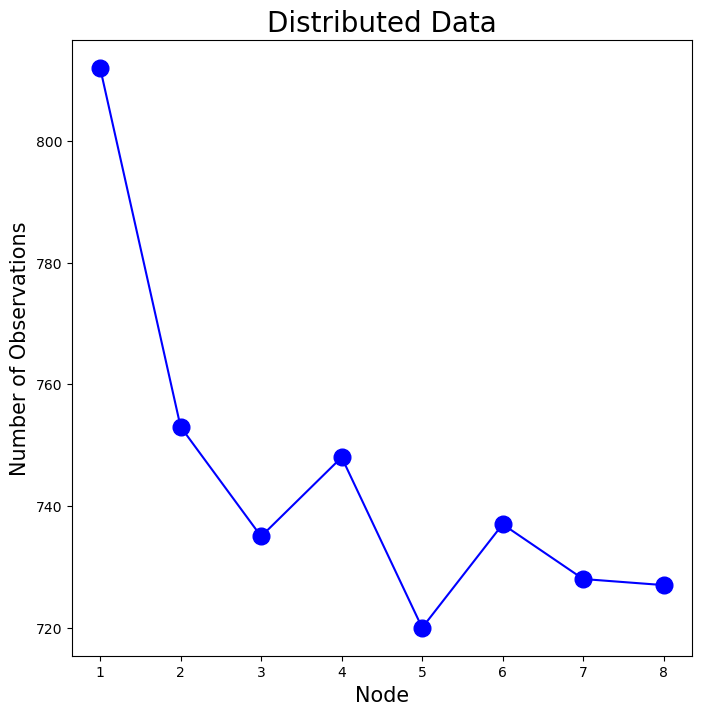

In [8]:
node_data = conn.table.tableDetails(
    level = "block",
    caslib = "casuser",
    name = indata
)['TableDetails']['Rows']

display(node_data)
display(sum(node_data))

plt.figure(figsize=(8,8))
plt.plot(list(range(1,len(node_data)+1)), node_data, color='blue', linestyle='-', marker='o', markersize=12)
plt.title('Distributed Data', fontsize=20)
plt.xlabel('Node', fontsize=15)
plt.ylabel('Number of Observations', fontsize=15)
plt.show()

# In-Memory Data Table, CASTable Object Reference, and a casDataFrame

In [9]:
conn.table.tableInfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime,TableRedistUpPolicy
0,HMEQ,5960,13,0,utf-8,2025-03-20T15:57:28+00:00,2025-03-20T15:57:28+00:00,2025-03-20T15:57:28+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,2025-03-20T15:57:28+00:00,2.058105e+09,Not Specified


In [10]:
type(castbl)

swat.cas.table.CASTable

In [11]:
type(castbl.head())

swat.dataframe.SASDataFrame

# Explore the Data

In [12]:
display(castbl.shape)
list(castbl)

(5960, 13)

['BAD',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [13]:
display(castbl.mean())
castbl['BAD'].mean()

BAD             0.199497
LOAN        18607.969799
MORTDUE     73760.817200
VALUE      101776.048741
YOJ             8.922268
DEROG           0.254570
DELINQ          0.449442
CLAGE         179.766275
NINQ            1.186055
CLNO           21.296096
DEBTINC        33.779915
dtype: float64

0.199496644295302

In [14]:
castbl.describe(include=['numeric', 'character'])

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708.0,5681.0,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,2.000000,540.000000,5053.000000,5381.000000,2.0,6.0,99.000000,11.000000,14.000000,5314.000000,16.000000,62.000000,4693.000000
top,0.000000,15000.000000,42000.000000,60000.000000,NaN,NaN,0.000000,0.000000,0.000000,206.966667,0.000000,16.000000,203.312149
freq,4771.000000,105.000000,11.000000,15.000000,3928.0,2388.0,415.000000,4527.000000,4179.000000,7.000000,2531.000000,316.000000,1.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46268.000000,66069.000000,NaN,NaN,3.000000,0.000000,0.000000,115.103197,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91491.000000,119831.500000,NaN,NaN,13.000000,0.000000,0.000000,231.574834,2.000000,26.000000,39.003141


# Wrapper

In [15]:
# Head function on the castbl object
display(castbl.head())

# Fetch action on the server data
conn.table.fetch(table=indata, to=6)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1.0,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1.0,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1.0,1500.0,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1.0,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1.0,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1.0,1500.0,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1.0,1700.0,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614


In [16]:
# nrow function on the castbl object
display(castbl.shape[0])

# recordCount action on the server data
conn.table.recordCount(table=indata)

5960

,N
0,5960


# List Action Sets

In [17]:
#http://go.documentation.sas.com/?cdcId=pgmcdc&cdcVersion=8.11&docsetId=allprodsactions&docsetTarget=actionSetsByName.htm&locale=en

# Explore the Data using CAS Actions

In [18]:
conn.loadActionSet('simple')
actions = conn.builtins.help(actionSet='simple')

NOTE: Added action set 'simple'.
NOTE: Information for action set 'simple':
NOTE:    simple
NOTE:       mdSummary - Calculates multidimensional summaries of numeric variables
NOTE:       numRows - Shows the number of rows in a Cloud Analytic Services table
NOTE:       summary - Generates descriptive statistics of numeric variables such as the sample mean, sample variance, sample size, sum of squares, and so on
NOTE:       correlation - Computes Pearson product-moment correlations.
NOTE:       regression - Performs a linear regression up to 3rd-order polynomials
NOTE:       crossTab - Performs one-way or two-way tabulations
NOTE:       distinct - Computes the distinct number of values of the variables in the variable list
NOTE:       topK - Returns the top-K and bottom-K distinct values of each variable included in the variable list based on a user-specified ranking order
NOTE:       groupBy - Builds BY groups in terms of the variable value combinations given the variables in the variab

In [19]:
conn.simple.correlation(
    table = indata,
    inputs = ["LOAN","VALUE","MORTDUE"]
)

,Variable,N,Mean,Sum,StdDev,Minimum,Maximum
0,LOAN,5960.0,18607.969799,1.109035e+08,11207.480417,1100.0,89900.0
1,VALUE,5848.0,101776.048741,5.951863e+08,57385.775334,8000.0,855909.0
2,MORTDUE,5442.0,73760.817200,4.014064e+08,44457.609458,2063.0,399550.0
,Variable,LOAN,VALUE,MORTDUE,Nobs1,Nobs2,Nobs3
0,LOAN,1.000000,0.335393,0.228595,5960.0,5848.0,5442.0
1,VALUE,0.335393,1.000000,0.875666,5848.0,5848.0,5357.0
2,MORTDUE,0.228595,0.875666,1.000000,5442.0,5357.0,5442.0


In [20]:
conn.simple.distinct(
    table = indata,
    inputs = list(castbl)
)

,Column,NDistinct,NMiss,Trunc
0,BAD,2.0,0.0,0.0
1,LOAN,540.0,0.0,0.0
2,MORTDUE,5054.0,518.0,0.0
3,VALUE,5382.0,112.0,0.0
4,REASON,3.0,252.0,0.0
5,JOB,7.0,279.0,0.0
6,YOJ,100.0,515.0,0.0
7,DEROG,12.0,708.0,0.0
8,DELINQ,15.0,580.0,0.0
9,CLAGE,5315.0,308.0,0.0


In [21]:
conn.simple.freq(
    table = indata,
    inputs = ["BAD","JOB","REASON"]
)

,Column,NumVar,CharVar,FmtVar,Level,Frequency
0,BAD,0.0,,0,1,4771.0
1,BAD,1.0,,1,2,1189.0
2,JOB,NaN,,,1,279.0
3,JOB,NaN,Mgr,Mgr,2,767.0
4,JOB,NaN,Office,Office,3,948.0
5,JOB,NaN,Other,Other,4,2388.0
6,JOB,NaN,ProfExe,ProfExe,5,1276.0
7,JOB,NaN,Sales,Sales,6,109.0
8,JOB,NaN,Self,Self,7,193.0
9,REASON,NaN,,,1,252.0


In [22]:
conn.simple.crossTab(
    table = indata,
    row = "BAD", col = "JOB"
)

,BAD,Col1,Col2,Col3,Col4,Col5,Col6
0,0,588.0,823.0,1834.0,1064.0,71.0,135.0
1,1,179.0,125.0,554.0,212.0,38.0,58.0


In [23]:
conn.loadActionSet('cardinality')
actions = conn.builtins.help(actionSet='cardinality')

NOTE: Added action set 'cardinality'.
NOTE: Information for action set 'cardinality':
NOTE:    cardinality
NOTE:       summarize - Provides actions for evaluating data cardinality


In [24]:
conn.cardinality.summarize(
    table = indata,
    cardinality = dict(name='card', replace=True)
)

NOTE: Writing cardinality.
NOTE: status = 0.
NOTE: The Cloud Analytic Services server processed the request in 0.010151 seconds.


+ Elapsed: 0.0112s, user: 0.0307s, sys: 0.000522s, mem: 3.27mb

In [25]:
display(conn.table.fetch(table='card', to=5))
conn.table.recordCount(table='card')

,_VARNAME_,_FMTWIDTH_,_TYPE_,_RLEVEL_,_ORDER_,_MORE_,_CARDINALITY_,_NOBS_,_SUMFREQS_,_NMISS_,_SKEWNESS_,_KURTOSIS_,_MFREQ_,_MFREQFOUNDLEVEL_,_MFREQNUM_,_MFREQCHR_,_MFREQCFMT_,_LASTNUM_,_LASTCHR_,_LASTCFMT_
0,BAD,12.0,N,CLASS,ASC,N,2.0,5960.0,5960.0,0.0,1.504317,0.263057,4771.0,Y,0.0,,0,1.0,,1
1,LOAN,12.0,N,INTERVAL,ASC,Y,20.0,5960.0,5960.0,0.0,2.023781,6.932590,5890.0,N,NaN,,,3600.0,,3600
2,MORTDUE,12.0,N,INTERVAL,ASC,Y,20.0,5960.0,5442.0,518.0,1.814481,6.481866,5422.0,N,NaN,,,5200.0,,5200
3,VALUE,12.0,N,INTERVAL,ASC,Y,20.0,5960.0,5848.0,112.0,3.053344,24.362805,5828.0,N,NaN,,,16700.0,,16700
4,REASON,7.0,C,CLASS,ASC,N,2.0,5960.0,5708.0,252.0,NaN,NaN,3928.0,Y,NaN,DebtCon,DebtCon,NaN,HomeImp,HomeImp


,N
0,13


# Define Cas Table

In [26]:
card = conn.CASTable(name = "card")
display(card.head())
card.shape

,_VARNAME_,_FMTWIDTH_,_TYPE_,_RLEVEL_,_ORDER_,_MORE_,_CARDINALITY_,_NOBS_,_SUMFREQS_,_NMISS_,_SKEWNESS_,_KURTOSIS_,_MFREQ_,_MFREQFOUNDLEVEL_,_MFREQNUM_,_MFREQCHR_,_MFREQCFMT_,_LASTNUM_,_LASTCHR_,_LASTCFMT_
0,BAD,12.0,N,CLASS,ASC,N,2.0,5960.0,5960.0,0.0,1.504317,0.263057,4771.0,Y,0.0,,0,1.0,,1
1,LOAN,12.0,N,INTERVAL,ASC,Y,20.0,5960.0,5960.0,0.0,2.023781,6.932590,5890.0,N,NaN,,,3600.0,,3600
2,MORTDUE,12.0,N,INTERVAL,ASC,Y,20.0,5960.0,5442.0,518.0,1.814481,6.481866,5422.0,N,NaN,,,5200.0,,5200
3,VALUE,12.0,N,INTERVAL,ASC,Y,20.0,5960.0,5848.0,112.0,3.053344,24.362805,5828.0,N,NaN,,,16700.0,,16700
4,REASON,7.0,C,CLASS,ASC,N,2.0,5960.0,5708.0,252.0,NaN,NaN,3928.0,Y,NaN,DebtCon,DebtCon,NaN,HomeImp,HomeImp


(13, 26)

# Visualize Numeric Variables Locally

In [27]:
conn.loadActionSet('sampling')
actions = conn.builtins.help(actionSet='sampling')

NOTE: Added action set 'sampling'.
NOTE: Information for action set 'sampling':
NOTE:    sampling
NOTE:       srs -  Samples a proportion of data from the input table or partitions the data into no more than three portions
NOTE:       stratified - Samples a proportion of data or partitions the data into no more than three portions within each stratum
NOTE:       oversample - Samples a user-specified proportion of data from the event level and adjusts the ratio between rare events and non-rare events to a user-specified ratio
NOTE:       kfold - K-fold partitioning.


In [28]:
conn.sampling.srs(
    table   = indata,
    samppct = 50,
    seed = 12345,
    partind = False,
    output  = dict(casOut = dict(name = 'mysam', replace = True),  copyVars = 'ALL')
)

NOTE: Simple Random Sampling is in effect.
NOTE: Using SEED=12345 for sampling.


[SRSFreq]

 Frequencies
 
    NObs  NSamp
 0  5960   2980

[OutputCasTables]

                casLib   Name Label  Rows  Columns                                        casTable
 0  CASUSER(christine)  mysam        2980       13  CASTable('mysam', caslib='CASUSER(christine)')

+ Elapsed: 0.0232s, user: 0.026s, sys: 0.000593s, mem: 20mb

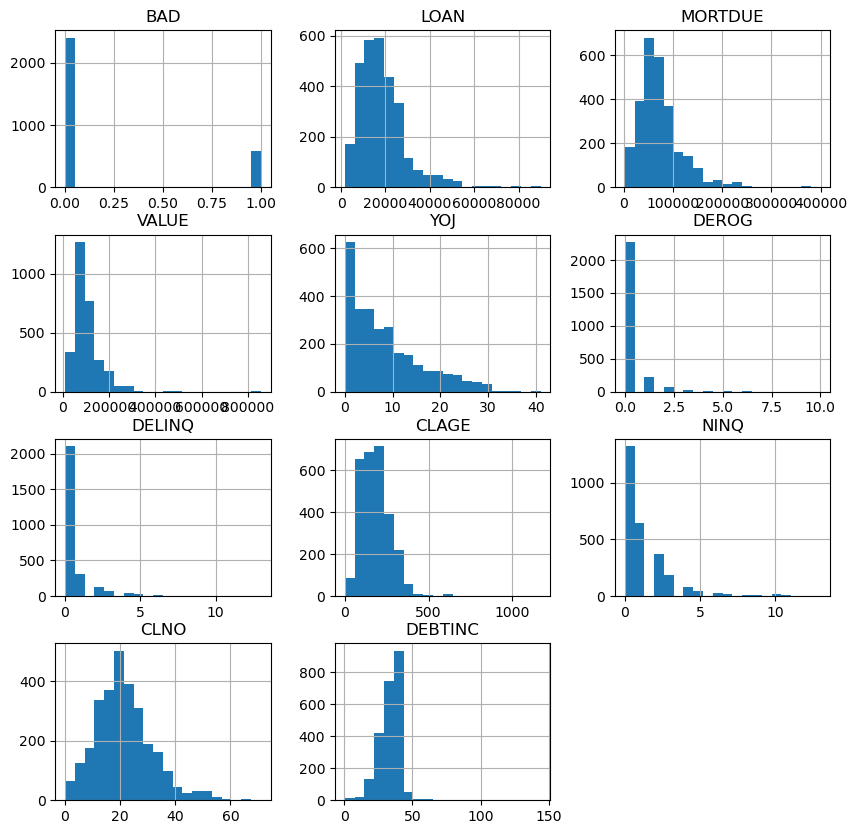

In [29]:
# Create connection object
mysam = conn.CASTable(name = "mysam")

# Bring data locally
df = mysam.to_frame()

# Create histograms of the numeric columns
df.hist(bins=20, figsize=(10,10))
plt.show()

# Check Data for Missing Values

In [30]:
# Create a casDataFrame containing number of missing values for each variable
tbl = castbl.distinct()['Distinct'][['Column', 'NMiss']]
display(type(tbl))
tbl

swat.dataframe.SASDataFrame

,Column,NMiss
0,BAD,0.0
1,LOAN,0.0
2,MORTDUE,518.0
3,VALUE,112.0
4,REASON,252.0
5,JOB,279.0
6,YOJ,515.0
7,DEROG,708.0
8,DELINQ,580.0
9,CLAGE,308.0


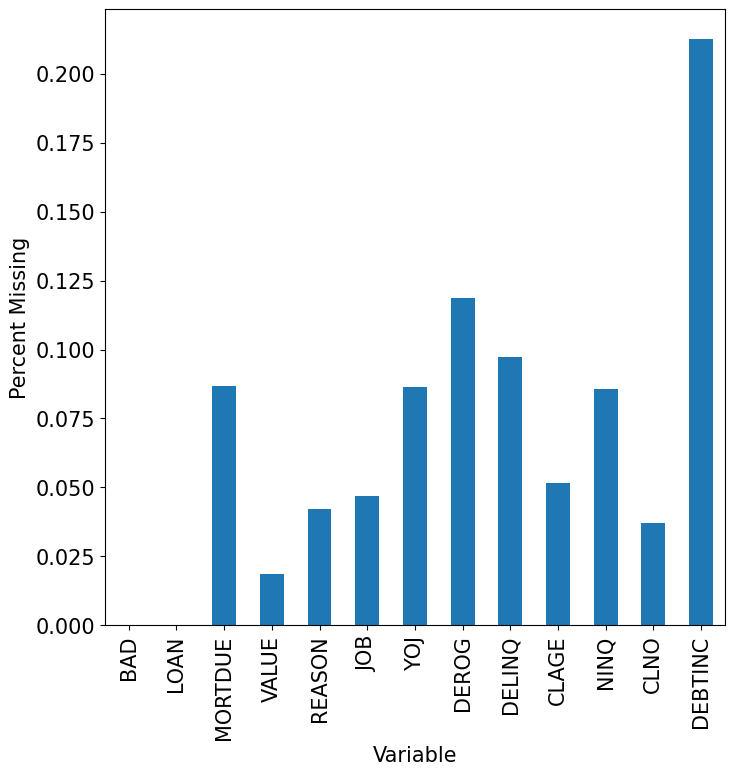

In [31]:
# Plot the percent of missing values locally
nr = castbl.shape[0]
tbl['PctMiss'] = tbl['NMiss']/nr
MissPlot = tbl.plot(x='Column', y='PctMiss', kind='bar', figsize=(8,8), fontsize=15)
MissPlot.set_xlabel('Variable', fontsize=15)
MissPlot.set_ylabel('Percent Missing', fontsize=15)
MissPlot.legend_.remove()
plt.show()

# Impute Missing Values

In [32]:
conn.dataPreprocess.impute(
    table = indata,
    methodContinuous = 'MEDIAN',
    methodNominal    = 'MODE',
    inputs           = list(castbl)[1:],
    copyAllVars      = True,
    casOut           = dict(name = indata, replace = True)
)

,Variable,ImputeTech,ResultVar,N,NMiss,ImputedValueContinuous,ImputedValueNominal
0,LOAN,Median,IMP_LOAN,5960.0,0.0,16300.000000,
1,MORTDUE,Median,IMP_MORTDUE,5442.0,518.0,65019.000000,
2,VALUE,Median,IMP_VALUE,5848.0,112.0,89235.500000,
3,REASON,Mode,IMP_REASON,5708.0,252.0,NaN,DebtCon
4,JOB,Mode,IMP_JOB,5681.0,279.0,NaN,Other
5,YOJ,Median,IMP_YOJ,5445.0,515.0,7.000000,
6,DEROG,Median,IMP_DEROG,5252.0,708.0,0.000000,
7,DELINQ,Median,IMP_DELINQ,5380.0,580.0,0.000000,
8,CLAGE,Median,IMP_CLAGE,5652.0,308.0,173.466667,
9,NINQ,Median,IMP_NINQ,5450.0,510.0,1.000000,


# Create Variable Shortcuts

In [33]:
# Get variable info and types
colinfo = conn.table.columninfo(table=indata)['ColumnInfo']
colinfo

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,BAD,,1,double,8,12,,0,0
1,LOAN,,2,double,8,12,,0,0
2,MORTDUE,,3,double,8,12,,0,0
3,VALUE,,4,double,8,12,,0,0
4,REASON,,5,varchar,7,7,,0,0
5,JOB,,6,varchar,7,7,,0,0
6,YOJ,,7,double,8,12,,0,0
7,DEROG,,8,double,8,12,,0,0
8,DELINQ,,9,double,8,12,,0,0
9,CLAGE,,10,double,8,12,,0,0


In [34]:
# Target variable is the first variable
target = colinfo['Column'][0]

# Get all variables
inputs = list(colinfo['Column'][1:])
nominals = list(colinfo.query('Type=="varchar"')['Column'])

# Get only imputed variables
inputs = [k for k in inputs if 'IMP_' in k]
nominals = [k for k in nominals if 'IMP_' in k]
nominals = [target] + nominals

display(target)
display(inputs)
display(nominals)

'BAD'

['IMP_CLAGE',
 'IMP_CLNO',
 'IMP_DEBTINC',
 'IMP_DELINQ',
 'IMP_DEROG',
 'IMP_LOAN',
 'IMP_MORTDUE',
 'IMP_NINQ',
 'IMP_VALUE',
 'IMP_YOJ',
 'IMP_JOB',
 'IMP_REASON']

['BAD', 'IMP_JOB', 'IMP_REASON']

# Python Machine Learning Demo - Part ll

# Split the Data into Training and Validation

In [35]:
conn.sampling.srs(
    table   = indata,
    samppct = 70,
    seed = 919,
    partind = True,
    output  = dict(casOut = dict(name = indata, replace = True),  copyVars = 'ALL')
)

NOTE: Simple Random Sampling is in effect.
NOTE: Using SEED=919 for sampling.


[SRSFreq]

 Frequencies
 
    NObs  NSamp
 0  5960   4172

[OutputCasTables]

                casLib  Name Label  Rows  Columns                                       casTable
 0  CASUSER(christine)  hmeq        5960       26  CASTable('hmeq', caslib='CASUSER(christine)')

+ Elapsed: 0.0258s, user: 0.019s, sys: 0.0136s, mem: 21.3mb

# View the partition

In [36]:
conn.loadActionSet('fedSql')
actions = conn.builtins.help(actionSet='fedSql')

NOTE: Added action set 'fedSql'.
NOTE: Information for action set 'fedSql':
NOTE:    fedSql
NOTE:       execDirect - Submits a SAS FedSQL language statement for immediate execution


In [37]:
# Make sure the partition worked correctly using SQL
counts = conn.fedSql.execDirect(query =
    '''
    SELECT _PartInd_, count(*) 
    FROM hmeq 
    GROUP BY _PartInd_;
    '''
)['Result Set']

display(counts)
counts['Percent'] = counts['COUNT']/sum(counts['COUNT'])
counts

,_PartInd_,COUNT
0,0.0,1788
1,1.0,4172


,_PartInd_,COUNT,Percent
0,0.0,1788,0.3
1,1.0,4172,0.7


In [38]:
# Refresh the castbl object
castbl = conn.CASTable(name=indata)

# Make sure the partition worked correctly using Python code
castbl['_PartInd_'].mean()

0.7

# Dimension Reduction - Var Reduce

In [39]:
conn.loadActionSet('varReduce')
actions = conn.builtins.help(actionSet='varReduce')

NOTE: Added action set 'varReduce'.
NOTE: Information for action set 'varReduce':
NOTE:    varReduce
NOTE:       unsuper - Provides an action for performing unsupervised dimension reduction
NOTE:       super - Provides an action for performing supervised dimension reduction


In [40]:
varReduce_obj = conn.varReduce.super(
    table = indata,
    target = target,
    inputs = inputs,
    nominals = nominals,
    varexp = 0.90
)

list(varReduce_obj)

['Nobs', 'SelectionSummary', 'SelectedEffects']

In [41]:
varReduce_obj['SelectionSummary']

,Iteration,Variable,Parameter,VarExp,SSE,MSE,AIC,AICC,BIC
0,1,IMP_DELINQ,IMP_DELINQ,0.120065,1.759871,0.000295,0.566918,2.566919,0.566699
1,2,IMP_DEROG,IMP_DEROG,0.165744,1.668511,0.000280,0.514281,2.514283,0.514849
2,3,IMP_CLAGE,IMP_CLAGE,0.190438,1.619124,0.000272,0.484906,2.484909,0.486261
3,4,IMP_DEBTINC,IMP_DEBTINC,0.207067,1.585866,0.000266,0.464822,2.464826,0.466965
4,5,IMP_NINQ,IMP_NINQ,0.215512,1.568976,0.000263,0.454785,2.454791,0.457716
5,6,IMP_LOAN,IMP_LOAN,0.220128,1.559745,0.000262,0.449556,2.449563,0.453273
6,7,IMP_JOB,IMP_JOB Office,0.224244,1.551512,0.000261,0.444935,2.444944,0.449440
7,8,IMP_CLNO,IMP_CLNO,0.227593,1.544814,0.000260,0.441279,2.441291,0.446572
8,9,IMP_JOB,IMP_JOB Sales,0.229777,1.540447,0.000259,0.439119,2.439134,0.445199
9,10,IMP_REASON,IMP_REASON DebtCon,0.232106,1.535788,0.000258,0.436762,2.436779,0.443629


In [42]:
display(varReduce_obj['SelectedEffects'])
list(varReduce_obj['SelectedEffects']['Variable'])

,Number,Variable,Type
0,1,IMP_DELINQ,INTERVAL
1,2,IMP_DEROG,INTERVAL
2,3,IMP_CLAGE,INTERVAL
3,4,IMP_DEBTINC,INTERVAL
4,5,IMP_NINQ,INTERVAL
5,6,IMP_LOAN,INTERVAL
6,7,IMP_JOB,CLASS
7,8,IMP_CLNO,INTERVAL
8,9,IMP_REASON,CLASS
9,10,IMP_MORTDUE,INTERVAL


['IMP_DELINQ',
 'IMP_DEROG',
 'IMP_CLAGE',
 'IMP_DEBTINC',
 'IMP_NINQ',
 'IMP_LOAN',
 'IMP_JOB',
 'IMP_CLNO',
 'IMP_REASON',
 'IMP_MORTDUE',
 'IMP_VALUE',
 'IMP_YOJ']

# Logistic Regression

In [43]:
conn.loadActionSet('regression')
actions = conn.builtins.help(actionSet='regression')

NOTE: Added action set 'regression'.
NOTE: Information for action set 'regression':
NOTE:    regression
NOTE:       glm - Fits linear regression models using the method of least squares
NOTE:       genmod - Fits generalized linear regression models
NOTE:       logistic - Fits logistic regression models
NOTE:       logisticType3 - computes Type 3 or Joint tests that all parameters for an effect are zero
NOTE:       logisticCode - writes SAS DATA step code for computing predicted values of the fitted model
NOTE:       genmodScore - creates a table on the server that contains results from scoring observations by using a fitted model
NOTE:       logisticScore - creates a table on the server that contains results from scoring observations by using a fitted model
NOTE:       glmScore - creates a table on the server that contains results from scoring observations by using a fitted model
NOTE:       logisticAssociation - computes indices of rank correlation between predicted probabilities and 

In [44]:
conn.regression.logistic(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    classVars = nominals[1:],
    model = dict(depvar=target, effects=inputs, dist='binomial', link='logit'),
    store    = dict(name='lr_model',replace=True)
)

NOTE: Convergence criterion (GCONV=1E-8) satisfied.
NOTE: 493921 bytes were written to the table "lr_model" in the caslib "CASUSER(christine)".


[ModelInfo]

 Model Information
 
       RowId                 Description                        Value
 0      DATA                 Data Source                         HMEQ
 1  EVENTVAR  Response Variable (Events)                          BAD
 2      DIST                Distribution                     Binomial
 3      LINK               Link Function                        Logit
 4      TECH      Optimization Technique  Newton-Raphson with Ridging

[NObs]

 Number of Observations
 
    RowId                  Description   Value
 0  NREAD  Number of Observations Read  4172.0
 1  NUSED  Number of Observations Used  4172.0

[ResponseProfile]

 Response Profile
 
    OrderedValue   Outcome    Freq Modeled
 0             1     Event   829.0       *
 1             2  Nonevent  3343.0        

[ClassInfo]

 Class Level Information
 
         Class  Levels                               Values
 0     IMP_JOB     6.0  Mgr Office Other ProfExe Sales Self
 1  IMP_REASON     2.0                      DebtCon HomeImp

[ConvergenceStatus]

 Convergence Status
 
                                           Reason  Status   MaxGradient  Separation
 0  Convergence criterion (GCONV=1E-8) satisfied.       0  8.925919e-10          -3

[Dimensions]

 Dimensions
 
          RowId                 Description  Value
 0  NDESIGNCOLS           Columns in Design     19
 1     NEFFECTS           Number of Effects     13
 2    MAXEFCOLS          Max Effect Columns      6
 3   DESIGNRANK              Rank of Design     17
 4      OPTPARM  Parameters in Optimization     17

[GlobalTest]

 Testing Global Null Hypothesis: BETA=0
 
                Test  DF       ChiSq      ProbChiSq
 0  Likelihood Ratio  16  941.756147  3.270924e-190

[FitStatistics]

 Fit Statistics
 
     RowId                                  Description        Value
 0    M2LL                            -2 Log Likelihood  3218.585941
 1     AIC                      AIC (smaller is better)  3252.585941
 2    AICC                     AICC (smaller is better)  3252.733269
 3     SBC                      SBC (smaller is better)  3360.300505
 4  M2LLNC  -2 Log Likelihood without Binomial Constant  3218.585941
 5   AICNC                AIC without Binomial Constant  3252.585941
 6  AICCNC               AICC without Binomial Constant  3252.733269
 7   SBCNC                SBC without Binomial Constant  3360.300505

[ParameterEstimates]

 Parameter Estimates
 
          Effect  IMP_JOB IMP_REASON           Parameter            ParmName  DF  Estimate    StdErr       ChiSq     ProbChiSq
 0     Intercept                               Intercept           Intercept   1 -1.982714  0.371051   28.553149  9.116145e-08
 1     IMP_CLAGE                               IMP_CLAGE           IMP_CLAGE   1 -0.005064  0.000667   57.595295  3.219948e-14
 2      IMP_CLNO                                IMP_CLNO            IMP_CLNO   1 -0.016139  0.005167    9.756677  1.786726e-03
 3   IMP_DEBTINC                             IMP_DEBTINC         IMP_DEBTINC   1  0.065346  0.007626   73.429593  1.042907e-17
 4    IMP_DELINQ                              IMP_DELINQ          IMP_DELINQ   1  0.771066  0.047181  267.081001  4.910265e-60
 5     IMP_DEROG                               IMP_DEROG           IMP_DEROG   1  0.658495  0.062215  112.025614  3.527237e-26
 6      IMP_LOAN                                IMP_LOAN            IMP_LOAN   1 -0.000023  0.000005   19.947426  7.960103e-06
 7   IMP_MORTDUE                             IMP_MORTDUE         IMP_MORTDUE   1 -0.000004  0.000002    5.601206  1.794812e-02
 8      IMP_NINQ                                IMP_NINQ            IMP_NINQ   1  0.158342  0.024594   41.450263  1.209083e-10
 9     IMP_VALUE                               IMP_VALUE           IMP_VALUE   1  0.000003  0.000001    6.322912  1.191877e-02
 10      IMP_YOJ                                 IMP_YOJ             IMP_YOJ   1 -0.013202  0.006960    3.598360  5.783662e-02
 11      IMP_JOB      Mgr                    

# Support Vector Machine

In [45]:
conn.loadActionSet('svm')
actions = conn.builtins.help(actionSet='svm')

NOTE: Added action set 'svm'.
NOTE: Information for action set 'svm':
NOTE:    svm
NOTE:       svmTrain - Provides actions for support vector machines


In [46]:
conn.svm.svmTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    kernel = 'polynomial', 
    degree = 2,
    savestate = dict(name = 'svm_model', replace = True)
)

NOTE: SVM training is activated.
NOTE: 10992 bytes were written to the table "svm_model" in the caslib "CASUSER(christine)".


[ModelInfo]

 Model Information
 
            RowId                   Descr           Value     NValue
 0       TaskType               Task Type          C_CLAS        NaN
 1         Method  Optimization Technique  Interior Point        NaN
 2          Scale                   Scale             YES        NaN
 3         Kernel         Kernel Function      Polynomial        NaN
 4         degree           Kernel Degree               2   2.000000
 5  PenaltyMethod          Penalty Method               C        NaN
 6              C       Penalty Parameter               1   1.000000
 7        MaxIter      Maximum Iterations              25  25.000000
 8      Tolerance               Tolerance           1e-06   0.000001

[NObs]

 Observations
 
                          Descr       N
 0  Number of Observations Read  4172.0
 1  Number of Observations Used  4172.0

[TrainingResult]

 Training Results
 
           RowId                                Descr        Value
 0            WW             Inner Product of Weights    95.108381
 1          Beta                                 Bias    -0.996038
 2    TotalSlack  Total Slack (Constraint Violations)  1356.955708
 3    LongVector               Norm of Longest Vector     5.043928
 4      nSupport            Number of Support Vectors  1487.000000
 5   nSupportInM  Number of Support Vectors on Margin  1414.000000
 6      MaximumF                            Maximum F    10.234310
 7      MinimumF                            Minimum F    -3.373301
 8      nEffects                    Number of Effects    12.000000
 9       nLevels               Columns in Data Matrix    18.000000
 10   MatrixSize             Columns in Kernel Matrix   190.000000

[IterHistory]

 Iteration History
 
     Iteration  Complementarity   Feasibility
 0         1.0     1.002198e+06  2.533205e+06
 1         2.0     1.303046e+03  2.033378e+03
 2         3.0     1.676917e+02  2.033378e-05
 3         4.0     3.043338e+01  3.644096e-06
 4         5.0     1.697336e+01  5.404000e-07
 5         6.0     8.502481e+00  2.257750e-07
 6         7.0     8.408309e+00  2.051889e-07
 7         8.0     1.147125e+00  2.129270e-08
 8         9.0     3.115247e-01  2.772971e-09
 9        10.0     2.128727e-01  1.349499e-09
 10       11.0     1.029506e-01  5.509390e-10
 11       12.0     6.707434e-02  2.935647e-10
 12       13.0     4.457933e-02  1.683669e-10
 13       14.0     2.979146e-02  9.296294e-11
 14       15.0     2.023950e-02  5.369397e-11
 15       16.0     1.204549e-02  2.278047e-11
 16       17.0     7.212617e-03  9.564904e-12
 17       18.0     5.382288e-03  5.435719e-12
 18       19.0     2.797148e-03  2.277484e-12
 19       20.0     1.313004e-03  6.750156e-13
 20       21.0     3.754609e-04  7.488454e-14
 21       22.0     8.858380e-05  2.286117e-13
 22       23.0     3.053792e-05  1.345995e-13
 23       24.0     3.609517e-06  7.731316e-14
 24       25.0     6.522374e-08  3.339551e-13

[Misclassification]

 Misclassification Matrix
 
   Observed  PredEvent  PredNonEvent  TotalTrain
 0        0     3318.0          25.0      3343.0
 1        1      586.0         243.0       829.0
 2    Total     3904.0         268.0      4172.0

[FitStatistics]

 Fit Statistics
 
      Statistic  Training
 0     Accuracy  0.853547
 1        Error  0.146453
 2  Sensitivity  0.992522
 3  Specificity  0.293124

[OutputCasTables]

                casLib       Name Label  Rows  Columns                                           casTable
 0  CASUSER(christine)  svm_model           1        2  CASTable('svm_model', caslib='CASUSER(christin...

+ Elapsed: 0.304s, user: 0.418s, sys: 0.143s, mem: 2.44mb

# Decision Tree

In [47]:
conn.loadActionSet('decisionTree')
actions = conn.builtins.help(actionSet='decisionTree')

NOTE: Added action set 'decisionTree'.
NOTE: Information for action set 'decisionTree':
NOTE:    decisionTree
NOTE:       dtreeTrain - Trains a decision tree
NOTE:       dtreeScore - Scores a table using a decision tree model
NOTE:       dtreeSplit - Splits decision tree nodes
NOTE:       dtreePrune - Prune a decision tree
NOTE:       dtreeMerge - Merges decision tree nodes
NOTE:       dtreeCode - Generates DATA step scoring code from a decision tree model
NOTE:       forestTrain - Trains a forest. This action requires a SAS Visual Data Mining and Machine Learning license
NOTE:       forestScore - Scores a table using a forest model
NOTE:       forestCode - Generates DATA step scoring code from a forest model
NOTE:       gbtreeTrain - Trains a gradient boosting tree. This action requires a SAS Visual Data Mining and Machine Learning license
NOTE:       gbtreeScore - Scores a table using a gradient boosting tree model
NOTE:       gbtreeCode - Generates DATA step scoring code from a grad

In [48]:
conn.decisionTree.dtreeTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    casOut   = dict(name = 'dt_model', replace = True)
)

,Descr,Value
0,Number of Tree Nodes,39.000000
1,Max Number of Branches,2.000000
2,Number of Levels,6.000000
3,Number of Leaves,20.000000
4,Number of Bins,50.000000
5,Minimum Size of Leaves,5.000000
6,Maximum Size of Leaves,3784.000000
7,Number of Variables,12.000000
8,Confidence Level for Pruning,0.250000
9,Number of Observations Used,4172.000000


# Random Forest

In [49]:
conn.decisionTree.forestTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    nTree    = 1000,
    casOut   = dict(name = 'rf_model', replace = True)
)

,Descr,Value
0,Number of Trees,1000.000000
1,Number of Selected Variables (M),4.000000
2,Random Number Seed,0.000000
3,Bootstrap Percentage (%),63.212056
4,Number of Bins,50.000000
5,Number of Variables,12.000000
6,Confidence Level for Pruning,0.250000
7,Max Number of Tree Nodes,43.000000
8,Min Number of Tree Nodes,23.000000
9,Max Number of Branches,2.000000


# Gradient Boosting

In [50]:
conn.decisionTree.gbtreeTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    nTree    = 1000,
    casOut   = dict(name = 'gbt_model', replace = True)
)

,Descr,Value
0,Number of Trees,1000.000
1,Distribution,2.000
2,Learning Rate,0.100
3,Subsampling Rate,0.500
4,Number of Selected Variables (M),12.000
5,Number of Bins,50.000
6,Number of Variables,12.000
7,Max Number of Tree Nodes,31.000
8,Min Number of Tree Nodes,19.000
9,Max Number of Branches,2.000


# Neural Network

In [51]:
conn.loadActionSet('neuralNet')
actions = conn.builtins.help(actionSet='neuralNet')

NOTE: Added action set 'neuralNet'.
NOTE: Information for action set 'neuralNet':
NOTE:    neuralNet
NOTE:       annTrain - Trains an artificial neural network
NOTE:       annScore - Scores a table using an artificial neural network model
NOTE:       annCode - Generates DATA step scoring code from an artificial neural network model


In [52]:
conn.neuralNet.annTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    hiddens = [150],
    nloOpts    = dict(optmlOpt = dict(maxIters = 100, 
                      fConv = 1e-10),
                      lbfgsOpt = dict(numCorrections = 6)),
    casOut   = dict(name = 'nn_model', replace = True)
)

,Progress,Objective,Loss,FitError
0,1.0,4.708317,4.708317,0.515101
1,2.0,2.074189,2.074189,0.186002
2,3.0,1.796669,1.796669,0.176174
3,4.0,1.658024,1.658024,0.180489
4,5.0,1.613884,1.613884,0.171860
...,...,...,...,...
95,96.0,0.068032,0.068032,0.003595
96,97.0,0.062481,0.062481,0.003595
97,98.0,0.057986,0.057986,0.002637
98,99.0,0.054539,0.054539,0.002397


# Score the Models

In [53]:
conn.loadActionSet('aStore')
actions = conn.builtins.help(actionSet='aStore')

NOTE: Added action set 'aStore'.
NOTE: Information for action set 'aStore':
NOTE:    astore
NOTE:       saveas - Saves an ONNX model to an analytic store
NOTE:       extract - Extracts the saved ONNX blob from a remote saved ONNX store
NOTE:       check - Checks whether an ONNX model is valid
NOTE:       download - Downloads a remote store to a local store
NOTE:       upload - Uploads a local store to a remote store
NOTE:       describe - Describes some of the contents of the analytic store
NOTE:       score - Uses an analytic store to score an input table


In [54]:
#Score the support vector machine model
conn.aStore.score(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    rstore = "svm_model",
    out = dict(name="svm_scored", replace=True)
)

[OutputCasTables]

                casLib        Name  Rows  Columns                                           casTable
 0  CASUSER(christine)  svm_scored  1788        5  CASTable('svm_scored', caslib='CASUSER(christi...

[Timing]

 Task Timing
 
                  Task   Seconds   Percent
 0   Loading the Store  0.000137  0.022640
 1  Creating the State  0.002390  0.394692
 2             Scoring  0.003050  0.503721
 3               Total  0.006055  1.000000

+ Elapsed: 0.00941s, user: 0.00647s, sys: 0.00712s, mem: 21.7mb

In [55]:
#Score the logistic regression model
lr_score_obj = conn.regression.logisticScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    restore = "lr_model",
    casout = dict(name="lr_scored", replace=True),
    copyVars = target
)

#Score the decision tree model
dt_score_obj = conn.decisionTree.dtreeScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    model = "dt_model",
    casout = dict(name="dt_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

#Score the random forest model
rf_score_obj = conn.decisionTree.forestScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    model = "rf_model",
    casout = dict(name="rf_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

#Score the gradient boosting model
gb_score_obj = conn.decisionTree.gbtreeScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    model = "gbt_model",
    casout = dict(name="gbt_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

#Score the neural network model
nn_score_obj = conn.neuralNet.annScore(
    table    = dict(name = indata, where = '_PartInd_ = 0'),
    model = "nn_model",
    casout = dict(name="nn_scored",replace=True),
    copyVars = target,
    encodename = True,
    assessonerow = True
)

In [56]:
#View selected fields from the output object
display(nn_score_obj['OutputCasTables'])
nn_score_obj['ScoreInfo']

,casLib,Name,Rows,Columns,casTable
0,CASUSER(christine),nn_scored,1788,4,"CASTable('nn_scored', caslib='CASUSER(christin..."


,Descr,Value
0,Number of Observations Read,1788
1,Number of Observations Used,1788
2,Misclassification Error (%),8.389261745


# Assess the Models

In [57]:
conn.loadActionSet('percentile')
actions = conn.builtins.help(actionSet='percentile')

NOTE: Added action set 'percentile'.
NOTE: Information for action set 'percentile':
NOTE:    percentile
NOTE:       percentile - Calculate quantiles and percentiles
NOTE:       boxPlot - Calculate quantiles, high and low whiskers, and outliers
NOTE:       assess - Assess and compare models


In [58]:
# Change the name of the prediction variable for logistic regression
conn.dataStep.runCode(code='''
    data lr_scored;
        set lr_scored;
        rename _PRED_ = P_BAD1;
    run;
'''
)

# Add the target variable to the svm scored table
conn.dataStep.runCode(code='''
    data svm_scored;
        merge svm_scored(keep=P_BAD1) lr_scored(keep=BAD);
    run;
'''
)

[InputCasTables]

                casLib        Name  Rows  Columns                                           casTable
 0  CASUSER(christine)  svm_scored  1788        5  CASTable('svm_scored', caslib='CASUSER(christi...
 1  CASUSER(christine)   lr_scored  1788        2  CASTable('lr_scored', caslib='CASUSER(christin...

[OutputCasTables]

                casLib        Name  Rows  Columns  Append Promoted                                           casTable
 0  CASUSER(christine)  svm_scored  1788        2     NaN        N  CASTable('svm_scored', caslib='CASUSER(christi...

+ Elapsed: 0.0132s, user: 0.00534s, sys: 0.0241s, mem: 2.48mb

In [59]:
# Create prediction variable name
assess_input = 'P_' + target + '1'

# Assess the logistic regression model
lr_assess_obj = conn.percentile.assess(
   table = 'lr_scored',
   inputs = assess_input,
   casout = dict(name="lr_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the support vector machine model
svm_assess_obj = conn.percentile.assess(
   table = 'svm_scored',
   inputs = assess_input,
   casout = dict(name="svm_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the decision tree model
dt_assess_obj = conn.percentile.assess(
   table = "dt_scored",
   inputs = assess_input,
   casout = dict(name="dt_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the random forest model
rf_assess_obj = conn.percentile.assess(
   table = "rf_scored",
   inputs = assess_input,
   casout = dict(name="rf_assess",replace=True),
   response = target,
   event = "1"
)

#Assess the gradient boosting model
gb_assess_obj = conn.percentile.assess(
   table = "gbt_scored",
   inputs = assess_input,
   casout = dict(name="gbt_assess",replace=True),
   response = target,
   event = "1"
)

# Assess the neural network model
nn_assess_obj = conn.percentile.assess(
   table = "nn_scored",
   inputs = assess_input,
   casout = dict(name="nn_assess",replace=True),
   response = target,
   event = "1"
)

In [60]:
nn_assess_obj['OutputCasTables']

,casLib,Name,Rows,Columns,casTable
0,CASUSER(christine),nn_assess,20,21,"CASTable('nn_assess', caslib='CASUSER(christin..."
1,CASUSER(christine),nn_assess_ROC,100,22,"CASTable('nn_assess_ROC', caslib='CASUSER(chri..."


# View the Assess Action Output

In [61]:
display(conn.table.fetch(table='nn_assess', to=5))
conn.table.fetch(table='nn_assess_ROC', to=5)

,_Column_,_Event_,_Depth_,_Value_,_NObs_,_NEvents_,_NEventsBest_,_Resp_,_RespBest_,_Lift_,_CumResp_,_CumRespBest_,_CumLift_,_CumLiftBest_,_PctResp_,_PctRespBest_,_CumPctResp_,_CumPctRespBest_,_Gain_,_GainBest_
0,P_BAD1,1,5.0,0.999989,90.0,90.0,90.0,25.000000,25.0,5.000000,25.000000,25.0,5.000000,5.0,100.000000,100.0,100.000000,100.0,4.000000,4.0
1,P_BAD1,1,10.0,0.993738,90.0,80.0,90.0,22.222222,25.0,4.444444,47.222222,50.0,4.722222,5.0,88.888889,100.0,94.444444,100.0,3.722222,4.0
2,P_BAD1,1,15.0,0.756987,90.0,66.0,90.0,18.333333,25.0,3.666667,65.555556,75.0,4.370370,5.0,73.333333,100.0,87.407407,100.0,3.370370,4.0
3,P_BAD1,1,20.0,0.177088,90.0,48.0,90.0,13.333333,25.0,2.666667,78.888889,100.0,3.944444,5.0,53.333333,100.0,78.888889,100.0,2.944444,4.0
4,P_BAD1,1,25.0,0.041101,90.0,15.0,0.0,4.166667,0.0,0.833333,83.055556,100.0,3.322222,4.0,16.666667,0.0,66.444444,80.0,2.322222,3.0


,_Column_,_Event_,_Cutoff_,_TP_,_FP_,_FN_,_TN_,_Sensitivity_,_Specificity_,_KS_,_FPR_,_ACC_,_FDR_,_F1_,_C_,_GINI_,_GAMMA_,_TAU_,_MiscEvent_,_FNR_
0,P_BAD1,1,0.00,360.0,1428.0,0.0,0.0,1.000000,0.000000,0.0,1.000000,0.201342,0.798658,0.335196,0.90952,0.81904,0.920964,0.263556,0.798658,0.000000
1,P_BAD1,1,0.01,315.0,226.0,45.0,1202.0,0.875000,0.841737,0.0,0.158263,0.848434,0.417745,0.699223,0.90952,0.81904,0.920964,0.263556,0.151566,0.125000
2,P_BAD1,1,0.02,308.0,181.0,52.0,1247.0,0.855556,0.873249,0.0,0.126751,0.869687,0.370143,0.725559,0.90952,0.81904,0.920964,0.263556,0.130313,0.144444
3,P_BAD1,1,0.03,303.0,164.0,57.0,1264.0,0.841667,0.885154,0.0,0.114846,0.876398,0.351178,0.732769,0.90952,0.81904,0.920964,0.263556,0.123602,0.158333
4,P_BAD1,1,0.04,299.0,153.0,61.0,1275.0,0.830556,0.892857,0.0,0.107143,0.880313,0.338496,0.736453,0.90952,0.81904,0.920964,0.263556,0.119687,0.169444


# Bring Results to the Client

In [62]:
# Create table objects from the assess output, 
# bring data to the client, 
# and add new variable to data frame indicating model name

lr_assess_ROC = conn.CASTable(name = "lr_assess_ROC")
lr_assess_ROC = lr_assess_ROC.to_frame()
lr_assess_ROC['Model'] = 'Logistic Regression'

svm_assess_ROC = conn.CASTable(name = "svm_assess_ROC")
svm_assess_ROC = svm_assess_ROC.to_frame()
svm_assess_ROC['Model'] = 'Support Vector Machine'

dt_assess_ROC = conn.CASTable(name = "dt_assess_ROC")
dt_assess_ROC = dt_assess_ROC.to_frame()
dt_assess_ROC['Model']= 'Decision Tree'

rf_assess_ROC = conn.CASTable(name = "rf_assess_ROC")
rf_assess_ROC = rf_assess_ROC.to_frame()
rf_assess_ROC['Model'] = 'Random Forest'

gbt_assess_ROC = conn.CASTable(name = "gbt_assess_ROC")
gbt_assess_ROC = gbt_assess_ROC.to_frame()
gbt_assess_ROC['Model'] = 'Gradient Boosting'

nn_assess_ROC = conn.CASTable(name = "nn_assess_ROC")
nn_assess_ROC = nn_assess_ROC.to_frame()
nn_assess_ROC['Model'] = 'Neural Network'

# Compare Confusion Matrix

In [63]:
df_assess = pd.DataFrame()
df_assess = pd.concat([lr_assess_ROC,svm_assess_ROC,dt_assess_ROC,rf_assess_ROC,gbt_assess_ROC,nn_assess_ROC])
cutoff_index = round(df_assess['_Cutoff_'],2)==0.5
compare = df_assess[cutoff_index].reset_index(drop=True)
compare[['Model','_TP_','_FP_','_FN_','_TN_']]

,Model,_TP_,_FP_,_FN_,_TN_
0,Logistic Regression,127.0,54.0,233.0,1374.0
1,Support Vector Machine,105.0,23.0,255.0,1405.0
2,Decision Tree,101.0,24.0,259.0,1404.0
3,Random Forest,97.0,18.0,263.0,1410.0
4,Gradient Boosting,277.0,45.0,83.0,1383.0
5,Neural Network,253.0,43.0,107.0,1385.0


# Compare Misclassification

In [64]:
compare['Misclassification'] = 1-compare['_ACC_']
miss = compare[round(compare['_Cutoff_'],2)==0.5][['Model','Misclassification']]
miss.sort_values('Misclassification')

,Model,Misclassification
4,Gradient Boosting,0.071588
5,Neural Network,0.083893
1,Support Vector Machine,0.155481
3,Random Forest,0.157159
2,Decision Tree,0.158277
0,Logistic Regression,0.160515


# Compare ROC Curves

['Logistic Regression',
 'Support Vector Machine',
 'Decision Tree',
 'Random Forest',
 'Gradient Boosting',
 'Neural Network']

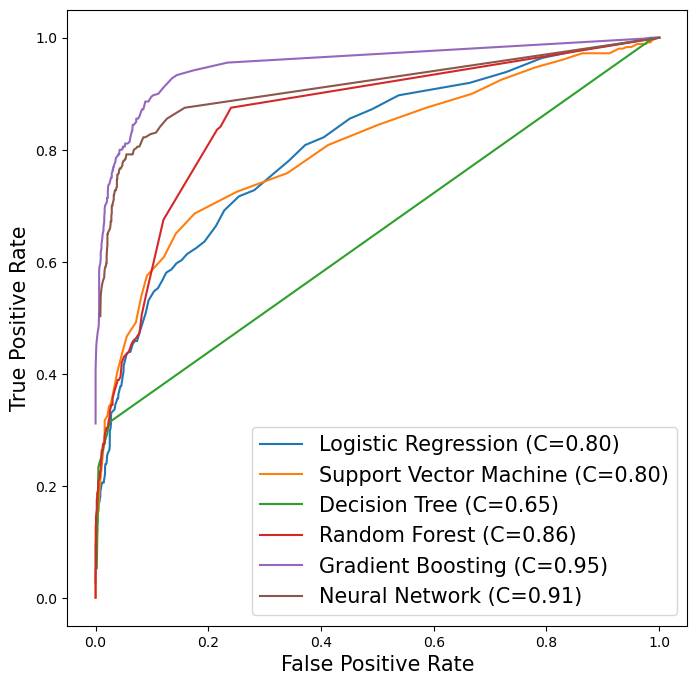

In [65]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())
display(models)

# Iteratively add each curve to the plot
for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_FPR_'],tmp['_Sensitivity_'], label=X+' (C=%0.2f)'%tmp['_C_'].mean())

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

# Compare Lift Curves

In [66]:
lr_assess_lift = conn.CASTable(name = "lr_assess")
lr_assess_lift = lr_assess_lift.to_frame()
lr_assess_lift['Model'] = 'Logistic Regression'

svm_assess_lift = conn.CASTable(name = "svm_assess")
svm_assess_lift = svm_assess_lift.to_frame()
svm_assess_lift['Model'] = 'Support Vector Machine'

dt_assess_lift = conn.CASTable(name = "dt_assess")
dt_assess_lift = dt_assess_lift.to_frame()
dt_assess_lift['Model']= 'Decision Tree'

rf_assess_lift = conn.CASTable(name = "rf_assess")
rf_assess_lift = rf_assess_lift.to_frame()
rf_assess_lift['Model'] = 'Random Forest'

gbt_assess_lift = conn.CASTable(name = "gbt_assess")
gbt_assess_lift = gbt_assess_lift.to_frame()
gbt_assess_lift['Model'] = 'Gradient Boosting'

nn_assess_lift = conn.CASTable(name = "nn_assess")
nn_assess_lift = nn_assess_lift.to_frame()
nn_assess_lift['Model'] = 'Neural Network'

df_assess = pd.DataFrame()
df_assess = pd.concat([lr_assess_lift,svm_assess_lift,dt_assess_lift,rf_assess_lift,gbt_assess_lift,nn_assess_lift])

['Logistic Regression',
 'Support Vector Machine',
 'Decision Tree',
 'Random Forest',
 'Gradient Boosting',
 'Neural Network']

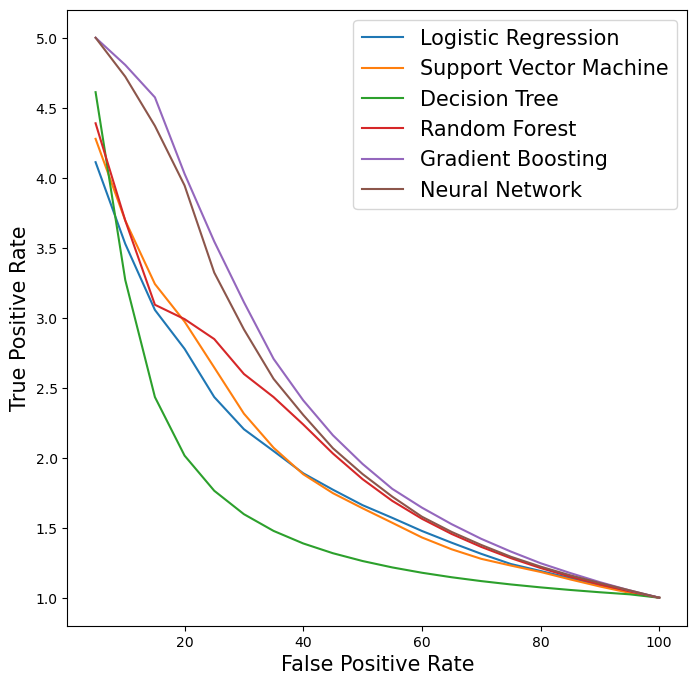

In [67]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())
display(models)

# Iteratively add curves to the plot
for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_Depth_'],tmp['_CumLift_'], label=X)

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

# Fit a Gradient Boosting Model in Python Locally

In [68]:
# Create sample to bring to the client
conn.sampling.srs(
    table   = indata,
    samppct = 75,
    seed = 12345,
    partind = False,
    output  = dict(casOut = dict(name = 'mysam', replace = True),  copyVars = 'ALL')
)

NOTE: Simple Random Sampling is in effect.
NOTE: Using SEED=12345 for sampling.


[SRSFreq]

 Frequencies
 
    NObs  NSamp
 0  5960   4470

[OutputCasTables]

                casLib   Name Label  Rows  Columns                                        casTable
 0  CASUSER(christine)  mysam        4470       26  CASTable('mysam', caslib='CASUSER(christine)')

+ Elapsed: 0.027s, user: 0.0282s, sys: 0.00457s, mem: 20.9mb

In [69]:
# Bring data locally
mysam = conn.CASTable(name = "mysam")
df = mysam.to_frame()
df = df[[target]+inputs+['_PartInd_']]

# Create dummy variables
df = pd.concat([df, pd.get_dummies(df[nominals[1:]])], axis=1).drop(nominals[1:], axis=1)

# Split into training and validation
train = df[df['_PartInd_']==1]
valid = df[df['_PartInd_']==0]

# Split target and inputs
x_train = train.drop(target, axis=1)
x_valid = valid.drop(target, axis=1)
y_train = train[target]
y_valid = valid[target]

# Build python gradient boosting model with scikit-learn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Fit the model locally
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/opt/conda/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


GradientBoostingClassifier()

# Score and Assess Model on Validation Data

In [70]:
gb_score = gb.predict(x_valid)
gb_misclassification = 1 - accuracy_score(y_valid, gb_score)
pymiss = pd.DataFrame({'Model':'Python - Gradient Boosting', 'Misclassification':gb_misclassification}, index=[0])
pymiss

,Model,Misclassification
0,Python - Gradient Boosting,0.110776


# Final Assessment with CAS and Python Models

In [71]:
# Combine the assessments and order by most accurate on validation data
miss_all = pd.DataFrame(miss).append(pymiss, ignore_index=True)
miss_all.sort_values('Misclassification').reset_index(drop=True)

/tmp/ipykernel_130/624889909.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  miss_all = pd.DataFrame(miss).append(pymiss, ignore_index=True)


,Model,Misclassification
0,Gradient Boosting,0.071588
1,Neural Network,0.083893
2,Python - Gradient Boosting,0.110776
3,Support Vector Machine,0.155481
4,Random Forest,0.157159
5,Decision Tree,0.158277
6,Logistic Regression,0.160515


# View All Data Tables in Current Session

In [72]:
conn.table.tableInfo()['TableInfo'][['Name','Rows','Columns']]

,Name,Rows,Columns
0,CARD,13,26
1,HMEQ,5960,26
2,LR_MODEL,1,2
3,SVM_MODEL,1,2
4,DT_MODEL,39,35
5,RF_MODEL,32474,41
6,GBT_MODEL,30186,31
7,NN_MODEL,2852,15
8,DT_SCORED,1788,13
9,RF_SCORED,1788,6


# Add caslib to specify a data source

In [73]:
# Show the current location
conn.table.caslibInfo(active=False, caslib="casuser")

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient,TableRedistUpPolicy
0,CASUSER(christine),PATH,Personal File System Caslib,/home/christine/casuser/,,1.0,0.0,1.0,1.0,0.0,1.0,Not Specified


In [74]:
# Add CAS library named mycl
conn.table.addCaslib(name="mycl", path="/workshop/EVMLOPR", dataSource="PATH", activeOnAdd=False)

NOTE: Cloud Analytic Services added the caslib 'mycl'.


,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient,TableRedistUpPolicy
0,mycl,PATH,,/workshop/EVMLOPR/,,0.0,1.0,0.0,0.0,0.0,0.0,Not Specified


In [75]:
# Show the current location
conn.table.caslibInfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient,TableRedistUpPolicy
0,CASUSER(christine),PATH,Personal File System Caslib,/home/christine/casuser/,,1.0,0.0,1.0,1.0,0.0,1.0,Not Specified
1,Formats,PATH,Stores user defined formats.,/cas/data/caslibs/formats/,,0.0,0.0,0.0,0.0,0.0,0.0,Not Specified
2,ModelPerformanceData,PATH,Stores performance data output for the Model M...,/cas/data/caslibs/modelMonitorLibrary/,,0.0,0.0,0.0,0.0,0.0,0.0,Not Specified
3,Models,PATH,Stores models created by Visual Analytics for ...,/cas/data/caslibs/models/,,0.0,0.0,0.0,0.0,0.0,0.0,Not Specified
4,Public,PATH,"Shared and writeable caslib, accessible to all...",/cas/data/caslibs/public/,,0.0,0.0,0.0,0.0,0.0,0.0,Not Specified
5,Samples,PATH,"Stores sample data, supplied by SAS.",/cas/data/caslibs/samples/,,0.0,0.0,0.0,0.0,0.0,0.0,Not Specified
6,SystemData,PATH,"Stores application generated data, used for ge...",/cas/data/caslibs/sysData/,,0.0,0.0,0.0,0.0,0.0,0.0,Not Specified
7,mycl,PATH,,/workshop/EVMLOPR/,,0.0,1.0,0.0,0.0,0.0,0.0,Not Specified


# Save the Best Model

In [76]:
conn.table.save(caslib = 'mycl', table = dict(name = 'gbt_model'), name = 'best_model_gbt', replace = True)

NOTE: Cloud Analytic Services saved the file best_model_gbt.sashdat in caslib mycl.


[caslib]

 'mycl'

[name]

 'best_model_gbt.sashdat'

+ Elapsed: 0.0404s, sys: 0.0171s, mem: 16.6mb

In [77]:
# Save the Model Attributes
conn.table.attribute(caslib = 'CASUSER', table = 'gbt_model_attr', name = 'gbt_model', task='convert')
conn.table.save(caslib = 'mycl', table = 'gbt_model_attr', name = 'attr', replace = True)

NOTE: Cloud Analytic Services saved the file attr.sashdat in caslib mycl.


[caslib]

 'mycl'

[name]

 'attr.sashdat'

+ Elapsed: 0.00865s, sys: 0.00214s, mem: 16.6mb

# Drop a CASLIB

In [78]:
conn.table.dropCaslib(caslib="mycl")

NOTE: Cloud Analytic Services removed the caslib 'mycl'.


+ Elapsed: 0.000637s, sys: 0.000607s, mem: 0.275mb

# Promote Data Table to Global Scope

In [79]:
conn.table.promote(caslib="casuser", name=indata)
conn.table.tableInfo()

NOTE: Cloud Analytic Services promoted table HMEQ in caslib CASUSER(christine) to table hmeq in caslib CASUSER(christine).


,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime,TableRedistUpPolicy
0,CARD,13,26,0,utf-8,2025-03-20T15:57:30+00:00,2025-03-20T15:57:30+00:00,2025-03-20T15:57:30+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified
1,LR_MODEL,1,2,0,utf-8,2025-03-20T15:57:34+00:00,2025-03-20T15:57:34+00:00,2025-03-20T15:57:43+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified
2,SVM_MODEL,1,2,0,utf-8,2025-03-20T15:57:34+00:00,2025-03-20T15:57:34+00:00,2025-03-20T15:57:43+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified
3,DT_MODEL,39,35,0,utf-8,2025-03-20T15:57:35+00:00,2025-03-20T15:57:35+00:00,2025-03-20T15:57:43+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified
4,RF_MODEL,32474,41,0,utf-8,2025-03-20T15:57:36+00:00,2025-03-20T15:57:36+00:00,2025-03-20T15:57:43+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified
5,GBT_MODEL,30186,31,0,utf-8,2025-03-20T15:57:40+00:00,2025-03-20T15:57:40+00:00,2025-03-20T15:57:47+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified
6,NN_MODEL,2852,15,0,utf-8,2025-03-20T15:57:43+00:00,2025-03-20T15:57:43+00:00,2025-03-20T15:57:44+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified
7,DT_SCORED,1788,13,0,utf-8,2025-03-20T15:57:43+00:00,2025-03-20T15:57:43+00:00,2025-03-20T15:57:44+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified
8,RF_SCORED,1788,6,0,utf-8,2025-03-20T15:57:43+00:00,2025-03-20T15:57:43+00:00,2025-03-20T15:57:44+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified
9,GBT_SCORED,1788,5,0,utf-8,2025-03-20T15:57:43+00:00,2025-03-20T15:57:43+00:00,2025-03-20T15:57:44+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified


# End the Session

In [80]:
conn.session.endSession()

+ Elapsed: 0.000247s, user: 0.000205s, sys: 2.6e-05s, mem: 0.204mb

# Python Machine Learning Demo - Part lll

![title](sas_viya_logo.png)

# Python Machine Learning Demo - Part lV

In [81]:
conn = swat.CAS("server.demo.sas.com", 30570, "christine", "Student1")

In [82]:
conn.table.tableInfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime,TableRedistUpPolicy
0,HMEQ,5960,26,0,utf-8,2025-03-20T15:57:33+00:00,2025-03-20T15:57:47+00:00,2025-03-20T15:57:47+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified


In [83]:
indata = 'hmeq'
conn.table.fetch(table=indata, to=6)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,IMP_DELINQ,IMP_DEROG,IMP_LOAN,IMP_MORTDUE,IMP_NINQ,IMP_VALUE,IMP_YOJ,IMP_JOB,IMP_REASON,_PartInd_
0,1.0,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,0.0,0.0,1100.0,25860.0,1.0,39025.0,10.5,Other,HomeImp,0.0
1,1.0,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,2.0,0.0,1300.0,70053.0,0.0,68400.0,7.0,Other,HomeImp,0.0
2,1.0,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,0.0,0.0,1500.0,13500.0,1.0,16700.0,4.0,Other,HomeImp,0.0
3,1.0,1500.0,NaN,NaN,,,NaN,NaN,NaN,NaN,0.0,0.0,1500.0,65019.0,1.0,89235.5,7.0,Other,DebtCon,0.0
4,0.0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,0.0,1700.0,97800.0,0.0,112000.0,3.0,Office,HomeImp,1.0
5,1.0,1700.0,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,0.0,0.0,1700.0,30548.0,1.0,40320.0,9.0,Other,HomeImp,0.0


In [84]:
# Target variable is the first variable
target = colinfo['Column'][0]

# Get all variables
inputs = list(colinfo['Column'][1:])
nominals = list(colinfo.query('Type=="varchar"')['Column'])

# Get only imputed variables
inputs = [k for k in inputs if 'IMP_' in k]
nominals = [k for k in nominals if 'IMP_' in k]
nominals = [target] + nominals

display(target)
display(inputs)
display(nominals)

'BAD'

['IMP_CLAGE',
 'IMP_CLNO',
 'IMP_DEBTINC',
 'IMP_DELINQ',
 'IMP_DEROG',
 'IMP_LOAN',
 'IMP_MORTDUE',
 'IMP_NINQ',
 'IMP_VALUE',
 'IMP_YOJ',
 'IMP_JOB',
 'IMP_REASON']

['BAD', 'IMP_JOB', 'IMP_REASON']

# Load a Saved Table into Memory

In [85]:
# Create a CASLIB
conn.table.addCaslib(name="mycl", path="/workshop/EVMLOPR", dataSource="PATH", activeOnAdd = False)

# Load table and table attributes into memory
conn.table.loadTable(caslib = 'mycl', path="best_model_gbt.sashdat", casOut=dict(name="gbt_model", replace=True))
conn.table.loadTable(caslib = 'mycl', path="attr.sashdat", casOut=dict(name="gbt_model_attr", replace=True))
conn.table.attribute(caslib='CASUSER', task='ADD', name='gbt_model', attrtable='gbt_model_attr')

conn.table.tableInfo()

NOTE: Cloud Analytic Services added the caslib 'mycl'.
NOTE: Cloud Analytic Services made the file best_model_gbt.sashdat available as table GBT_MODEL in caslib CASUSER(christine).
NOTE: Cloud Analytic Services made the file attr.sashdat available as table GBT_MODEL_ATTR in caslib CASUSER(christine).


,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime,TableRedistUpPolicy
0,GBT_MODEL,30186,31,0,utf-8,2025-03-20T15:57:48+00:00,2025-03-20T15:57:48+00:00,2025-03-20T15:57:48+00:00,UTF8,2.058105e+09,0,0,best_model_gbt.sashdat,mycl,0,christine,,2025-03-20T15:57:47+00:00,2.058105e+09,Not Specified
1,GBT_MODEL_ATTR,1,2,0,utf-8,2025-03-20T15:57:48+00:00,2025-03-20T15:57:48+00:00,2025-03-20T15:57:48+00:00,UTF8,2.058105e+09,0,0,attr.sashdat,mycl,0,christine,,2025-03-20T15:57:47+00:00,2.058105e+09,Not Specified
2,HMEQ,5960,26,0,utf-8,2025-03-20T15:57:33+00:00,2025-03-20T15:57:47+00:00,2025-03-20T15:57:48+00:00,UTF8,2.058105e+09,0,0,,,0,christine,,,NaN,Not Specified


# Model Tuning

In [86]:
conn.loadActionSet('autotune')
actions = conn.builtins.help(actionSet='autotune')

NOTE: Added action set 'autotune'.
NOTE: Information for action set 'autotune':
NOTE:    autotune
NOTE:       tuneSvm - Automatically adjusts support vector machine parameters to tune a model for minimum error
NOTE:       tuneForest - Automatically adjusts forest parameters to tune a model for minimum error
NOTE:       tuneDecisionTree - Automatically adjusts decision tree parameters to tune a model for minimum error
NOTE:       tuneNeuralNet - Automatically adjusts neural network parameters to tune a model for minimum error
NOTE:       tuneGradientBoostTree - Automatically adjusts gradient boosting tree parameters to tune a model for minimum error
NOTE:       tuneFactMac - Automatically adjusts factorization machine parameters to tune a model for minimum error
NOTE:       tuneBnet - Automatically adjusts Bayesian network classifier parameters to tune a model for minimum error
NOTE:       tuneTsne - Automatically adjusts t-Distributed Stochastic Neighbor Embedding algorithm parameters 

# Forest Tuning

In [87]:
conn.autotune.tuneForest(
    trainOptions = dict(
        table    = dict(name = indata, where = '_PartInd_ = 1'),
        target   = target, 
        inputs   = inputs, 
        nominals = nominals,
        casOut   = dict(name = 'rf_tune_model', replace = True) ) ,
    tunerOptions = dict(seed = 802, maxEvals = 10, maxTime = 30)
)

NOTE: Autotune is started for 'Forest' model.
NOTE: Autotune option SEARCHMETHOD='GA'.
NOTE: Autotune option MAXEVALS=10.
NOTE: Autotune option MAXTIME=30 (sec.).
NOTE: Autotune option SEED=802.
NOTE: Autotune objective is 'Misclassification Error Percentage'.
NOTE: Autotune number of parallel evaluations is set to 4, each using 0 worker nodes.
NOTE: Added action set 'decisionTree'.
         Iteration       Evals     Best Objective  Elapsed Time
                 0           1             10.863          0.76
                 1          10             10.144          2.85
NOTE: Data was partitioned during tuning, to tune based on validation score; the final model is trained and scored on all data.
NOTE: Autotune time is 4.00 seconds.


,Descr,Value
0,Number of Trees,121.000000
1,Number of Selected Variables (M),8.000000
2,Random Number Seed,802.000000
3,Bootstrap Percentage (%),72.222222
4,Number of Bins,47.000000
5,Number of Variables,12.000000
6,Confidence Level for Pruning,0.250000
7,Max Number of Tree Nodes,369.000000
8,Min Number of Tree Nodes,283.000000
9,Max Number of Branches,2.000000


# Deep Neural Network

In [88]:
conn.loadActionSet('neuralNet')
actions = conn.builtins.help(actionSet='neuralNet')

NOTE: Added action set 'neuralNet'.
NOTE: Information for action set 'neuralNet':
NOTE:    neuralNet
NOTE:       annTrain - Trains an artificial neural network
NOTE:       annScore - Scores a table using an artificial neural network model
NOTE:       annCode - Generates DATA step scoring code from an artificial neural network model


In [89]:
conn.neuralNet.annTrain(
    table    = dict(name = indata, where = '_PartInd_ = 1'),
    target   = target, 
    inputs   = inputs, 
    nominals = nominals,
    hiddens = [50,40,30],
    seed = 802,
    nloOpts = dict(optmlOpt = dict(maxIters = 200, 
                      fConv = 1e-10),
                      lbfgsOpt = dict(numCorrections = 6)),
    casOut   = dict(name = 'nn_h3_model', replace = True)
)

,Progress,Objective,Loss,FitError
0,1.0,4.503984,4.503984,0.709732
1,2.0,2.040886,2.040886,0.220278
2,3.0,1.833043,1.833043,0.202061
3,4.0,1.670827,1.670827,0.177133
4,5.0,1.578258,1.578258,0.166587
...,...,...,...,...
115,116.0,0.000108,0.000108,0.000000
116,117.0,0.000088,0.000088,0.000000
117,118.0,0.000075,0.000075,0.000000
118,119.0,0.000064,0.000064,0.000000


# Efficient Scoring - Looping

In [90]:
conn.loadActionSet('decisionTree')
actions = conn.builtins.help(actionSet='decisionTree')

NOTE: Added action set 'decisionTree'.
NOTE: Information for action set 'decisionTree':
NOTE:    decisionTree
NOTE:       dtreeTrain - Trains a decision tree
NOTE:       dtreeScore - Scores a table using a decision tree model
NOTE:       dtreeSplit - Splits decision tree nodes
NOTE:       dtreePrune - Prune a decision tree
NOTE:       dtreeMerge - Merges decision tree nodes
NOTE:       dtreeCode - Generates DATA step scoring code from a decision tree model
NOTE:       forestTrain - Trains a forest. This action requires a SAS Visual Data Mining and Machine Learning license
NOTE:       forestScore - Scores a table using a forest model
NOTE:       forestCode - Generates DATA step scoring code from a forest model
NOTE:       gbtreeTrain - Trains a gradient boosting tree. This action requires a SAS Visual Data Mining and Machine Learning license
NOTE:       gbtreeScore - Scores a table using a gradient boosting tree model
NOTE:       gbtreeCode - Generates DATA step scoring code from a grad

In [91]:
models = ['gbt','rf_tune','nn_h3']
actions = ['conn.decisionTree.gbtreeScore','conn.decisionTree.forestScore','conn.neuralNet.annScore']

# Create function to score a given model
def score_func(model):
    tmp_dict = dict(
        table    = dict(name = indata, where = '_PartInd_ = 0'),
        model = model+'_model',
        casout = dict(name=model+'_scored', replace=True),
        copyVars = target,
        encodename = True,
        assessonerow = True
    )
    return tmp_dict

# Loop over the models and actions
for i in list(range(len(models))):
    params = score_func(models[i])
    tmp_str = actions[i]+'(**params)'
    obj = eval(tmp_str)
    print(models[i])
    print(obj['ScoreInfo'].iloc[[2]])

gbt
                         Descr                             Value
2  Misclassification Error (%)                       7.158836689
rf_tune
                         Descr                             Value
2  Misclassification Error (%)                       11.29753915
nn_h3
                         Descr                             Value
2  Misclassification Error (%)                      7.9418344519


# Efficient Assessment - Looping

In [92]:
conn.loadActionSet('percentile')
actions = conn.builtins.help(actionSet='percentile')

NOTE: Added action set 'percentile'.
NOTE: Information for action set 'percentile':
NOTE:    percentile
NOTE:       percentile - Calculate quantiles and percentiles
NOTE:       boxPlot - Calculate quantiles, high and low whiskers, and outliers
NOTE:       assess - Assess and compare models


In [93]:
# Create function to assess a given model
def assess_func(model):
    tmp_dict = dict(
        table = model+'_scored',
        inputs = 'P_'+target+'1',
        casout = dict(name=model+'_assess' ,replace=True),
        response = target,
        event = "1"
    )
    return tmp_dict

# Loop over the models
for i in list(range(len(models))):
    params = assess_func(models[i])
    obj = conn.percentile.assess(**params)
    print(obj['OutputCasTables'][['Name','Rows','Columns']])

             Name  Rows  Columns
0      gbt_assess    20       21
1  gbt_assess_ROC   100       22
                 Name  Rows  Columns
0      rf_tune_assess    20       21
1  rf_tune_assess_ROC   100       22
               Name  Rows  Columns
0      nn_h3_assess    20       21
1  nn_h3_assess_ROC   100       22


# Create Confusion Matrix

In [94]:
# Create function to bring assess tables to the client
def assess_local_roc(model):
    castbl_obj = conn.CASTable(name = model+'_assess_ROC')
    local_tbl = castbl_obj.to_frame()
    local_tbl['Model'] = model
    return local_tbl

# Bring result tables to the client in a loop
df_assess = pd.DataFrame()
for i in list(range(len(models))):
    df_assess = pd.concat([df_assess, assess_local_roc(models[i])])

cutoff_index = round(df_assess['_Cutoff_'],2)==0.5
compare = df_assess[cutoff_index].reset_index(drop=True)
compare[['Model','_TP_','_FP_','_FN_','_TN_']]

,Model,_TP_,_FP_,_FN_,_TN_
0,gbt,277.0,45.0,83.0,1383.0
1,rf_tune,236.0,78.0,124.0,1350.0
2,nn_h3,270.0,52.0,90.0,1376.0


# Compare Misclassification

In [95]:
compare['Misclassification'] = 1-compare['_ACC_']
miss = compare[round(compare['_Cutoff_'],2)==0.5][['Model','Misclassification']]
miss.sort_values('Misclassification')

,Model,Misclassification
0,gbt,0.071588
2,nn_h3,0.079418
1,rf_tune,0.112975


# Compare ROC Curves

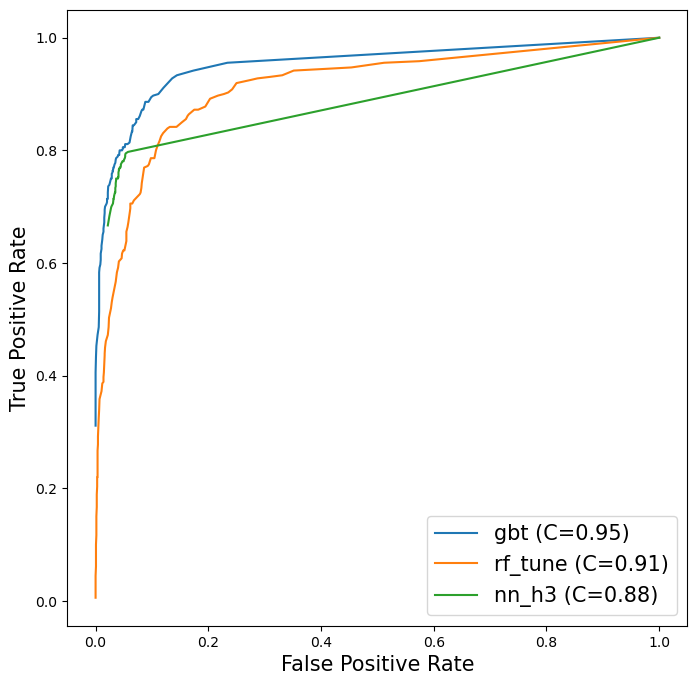

In [96]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())

# Iteratively add curves to the plot
for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_FPR_'],tmp['_Sensitivity_'], label=X+' (C=%0.2f)'%tmp['_C_'].mean())

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

# Compare Lift Curves

In [97]:
# Create function to bring assess results to the client
def assess_local_lift(model):
    castbl_obj = conn.CASTable(name = model+'_assess')
    local_tbl = castbl_obj.to_frame()
    local_tbl['Model'] = model
    return local_tbl

# Bring results to client in a loop
df_assess = pd.DataFrame()
for i in list(range(len(models))):
    df_assess = pd.concat([df_assess, assess_local_lift(models[i])])

['gbt', 'rf_tune', 'nn_h3']

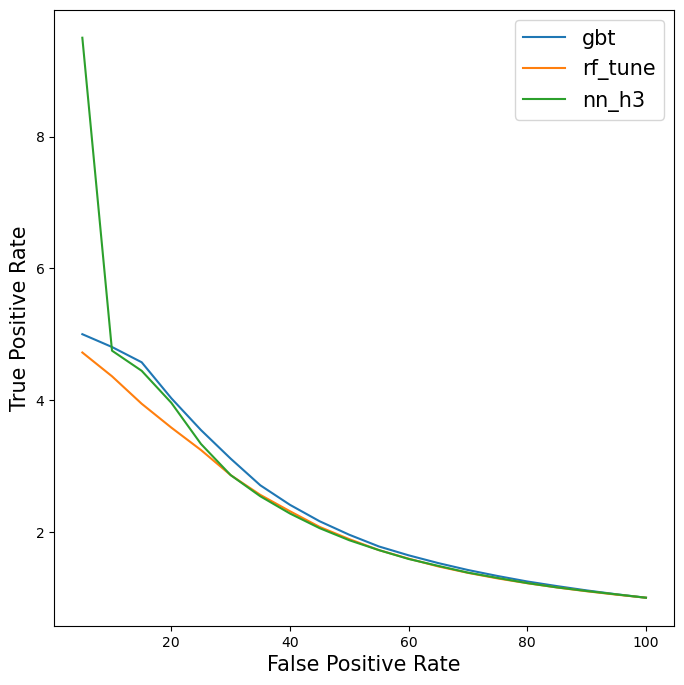

In [98]:
plt.figure(figsize=(8,8))
plt.plot()
models = list(df_assess.Model.unique())
display(models)

# Iteratively add curves to the plot
for X in models:
    tmp = df_assess[df_assess['Model']==X]
    plt.plot(tmp['_Depth_'],tmp['_CumLift_'], label=X)

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

# Drop Table from Memory

In [99]:
conn.table.dropTable(table=indata)

NOTE: Cloud Analytic Services dropped table hmeq from caslib CASUSER(christine).


+ Elapsed: 0.000958s, user: 0.000807s, sys: 2.3e-05s, mem: 0.303mb

# End the Session

In [100]:
conn.session.endSession()

+ Elapsed: 0.000285s, user: 0.000265s, mem: 0.225mb